# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week7\Day2\4. Supervised-Learning\website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
websites.shape

(1781, 21)

In [5]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [6]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [7]:
# Your comment here
'''
The dataset is composed out of 21 columns and 1781 rows. 14 of columns are numerical and 7 present categorical data. Two of tehses 7 columns can be transofrmed into datetype columns as they contain date. 
The column Type contains the value that is interesting for us i.e. is the website is begin or benign vs malicious.
I would assume that soem columns need to be transforem into numerical data. 
'''

'\nThe dataset is composed out of 21 columns and 1781 rows. 14 of columns are numerical and 7 present categorical data. Two of tehses 7 columns can be transofrmed into datetype columns as they contain date. \nThe column Type contains the value that is interesting for us i.e. is the website is begin or benign vs malicious.\nI would assume that soem columns need to be transforem into numerical data. \n'

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

<AxesSubplot:>

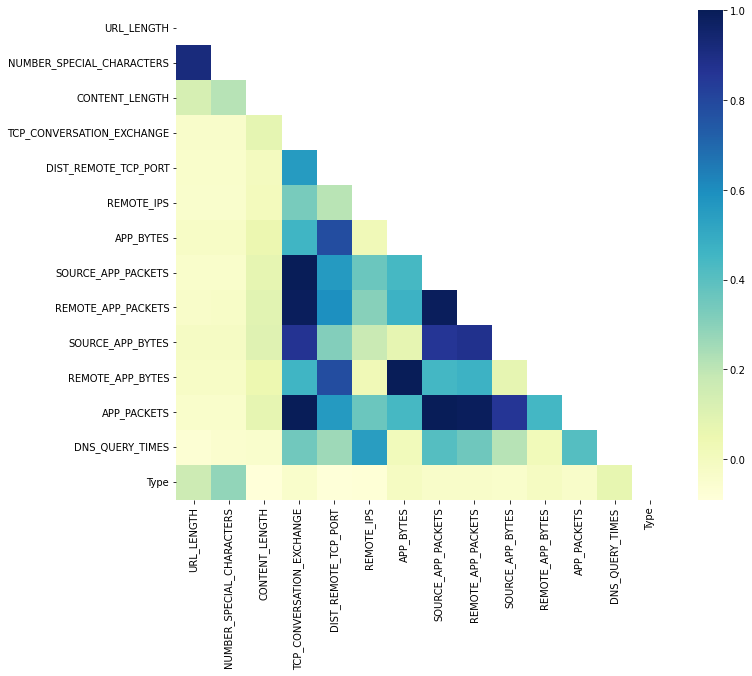

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your code here
corr = websites.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(websites.corr(), mask=mask, cmap="YlGnBu")

In [9]:
corr

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


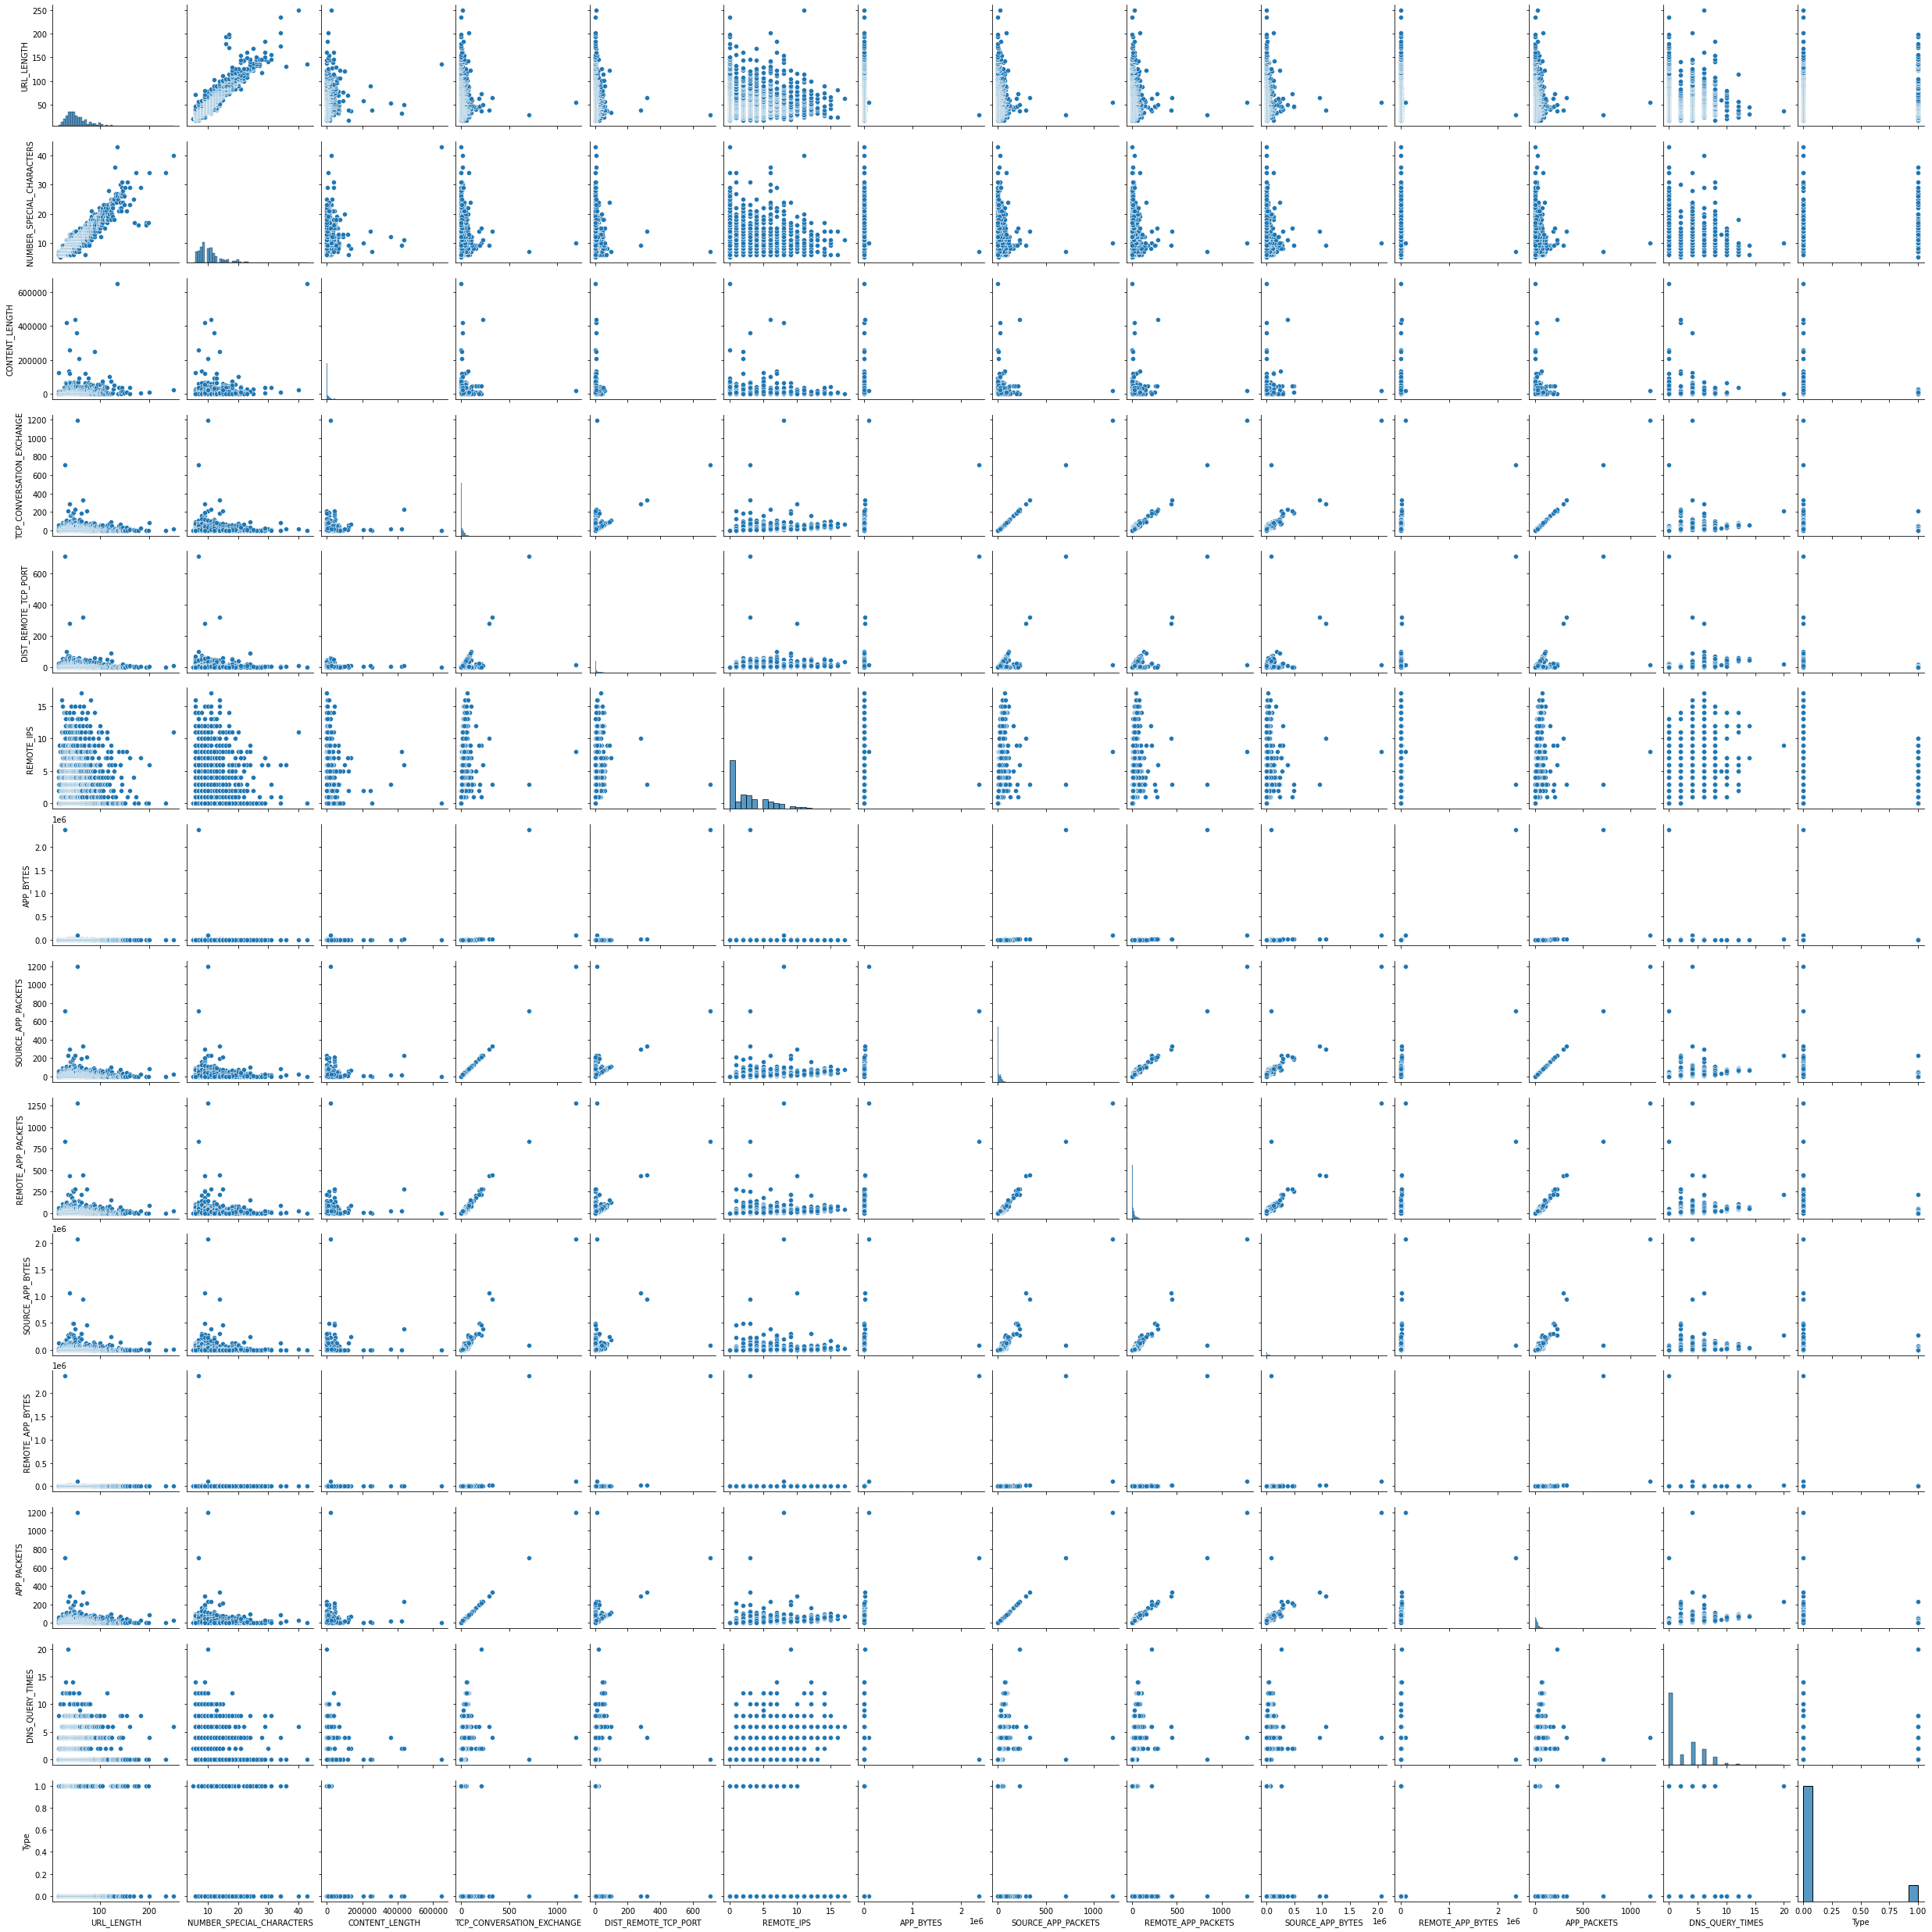

In [10]:
sns.pairplot(websites) 

In [11]:
# Your comment here
'''
The column with high collinearity to other columns is for sure TCP_CONVERSATION_EXCHANGE, SOURCE_APP_PACKETS and REMOTE_APP_PACKETS
'''

'\nThe column with high collinearity to other columns is for sure TCP_CONVERSATION_EXCHANGE, SOURCE_APP_PACKETS and REMOTE_APP_PACKETS\n'

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [12]:
# Your code here
websites.drop(columns='TCP_CONVERSATION_EXCHANGE', inplace=True)

<AxesSubplot:>

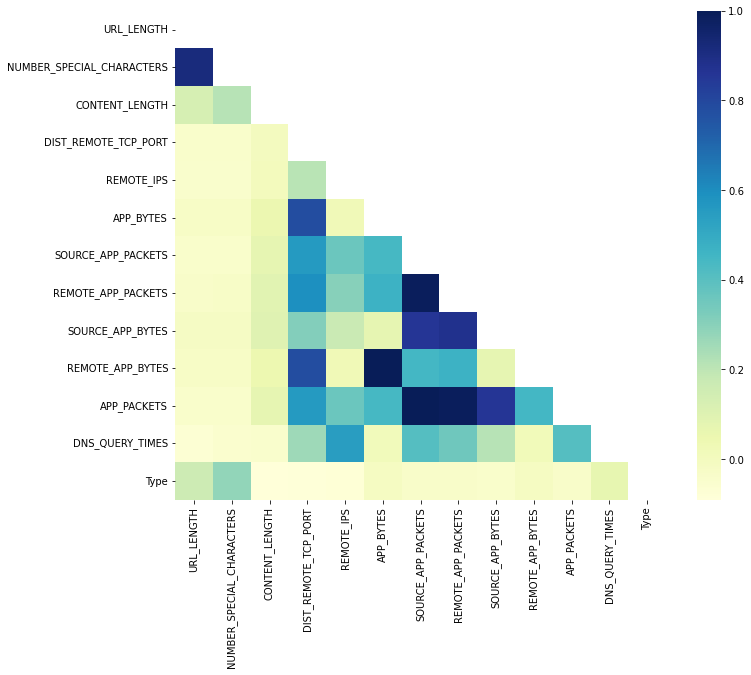

In [13]:
# Your code here
corr = websites.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu")

In [14]:
corr

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852
REMOTE_APP_BYTES,-0.026686,-0.024098,0.047595,0.781212,0.025324,0.999992,0.447448,0.470401,0.075328,1.000000,0.447448,0.016215,-0.011004


In [15]:
#I see that there is still a lot of collinearit, so I will drop next column
websites.drop(columns='SOURCE_APP_PACKETS', inplace=True)

<AxesSubplot:>

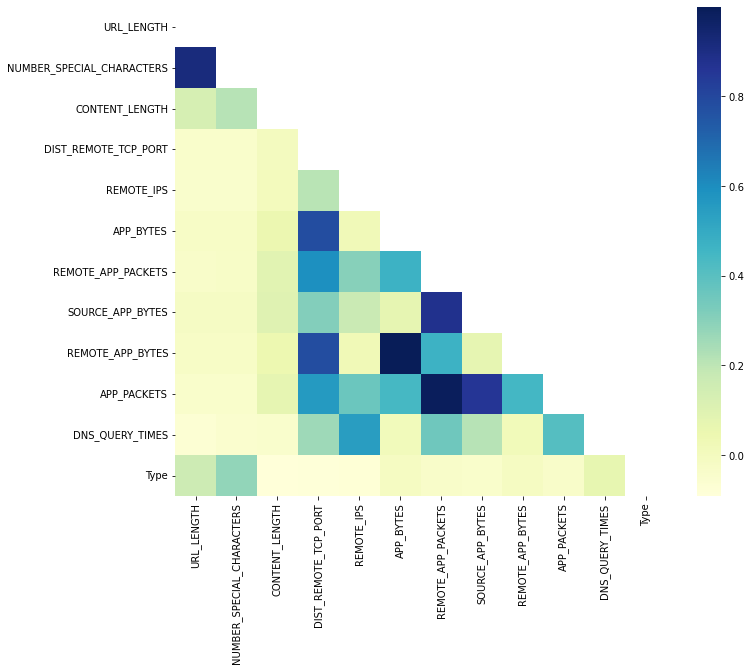

In [16]:
corr = websites.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu")

In [17]:
#I will drop 3rd column as there is still collinearlity
websites.drop(columns='REMOTE_APP_PACKETS', inplace=True)

<AxesSubplot:>

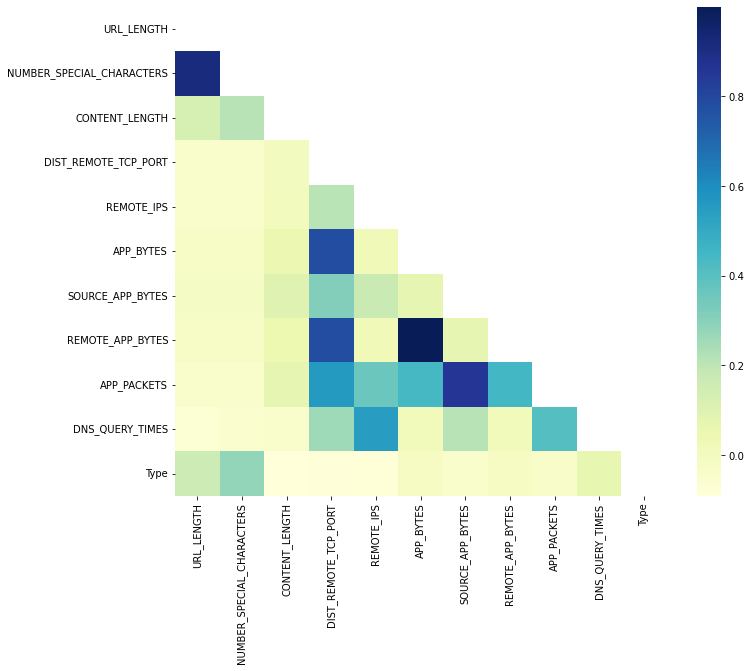

In [18]:
corr = websites.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu")

In [19]:
corr

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.039839,-0.046367,-0.026446,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.042619,-0.047103,-0.023914,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,-0.000381,0.004774,0.051202,0.100094,0.047595,0.074142,-0.045644,-0.090852
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,1.000000,0.210188,0.780238,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.210188,1.000000,0.023126,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.780238,0.023126,1.000000,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.313359,0.171651,0.074464,1.000000,0.075328,0.857495,0.215285,-0.043852
REMOTE_APP_BYTES,-0.026686,-0.024098,0.047595,0.781212,0.025324,0.999992,0.075328,1.000000,0.447448,0.016215,-0.011004
APP_PACKETS,-0.042264,-0.040096,0.074142,0.558612,0.361104,0.445822,0.857495,0.447448,1.000000,0.410843,-0.034414
DNS_QUERY_TIMES,-0.068582,-0.050048,-0.045644,0.259942,0.548189,0.012221,0.215285,0.016215,0.410843,1.000000,0.068753


In [20]:
# Your comment here
'''
There is still collinerality between Remote App bytes and App Bytes, so I will drop one of these two columns
'''


'\nThere is still collinerality between Remote App bytes and App Bytes, so I will drop one of these two columns\n'

In [21]:
# Print heatmap again
websites.drop(columns='REMOTE_APP_BYTES', inplace=True)


<AxesSubplot:>

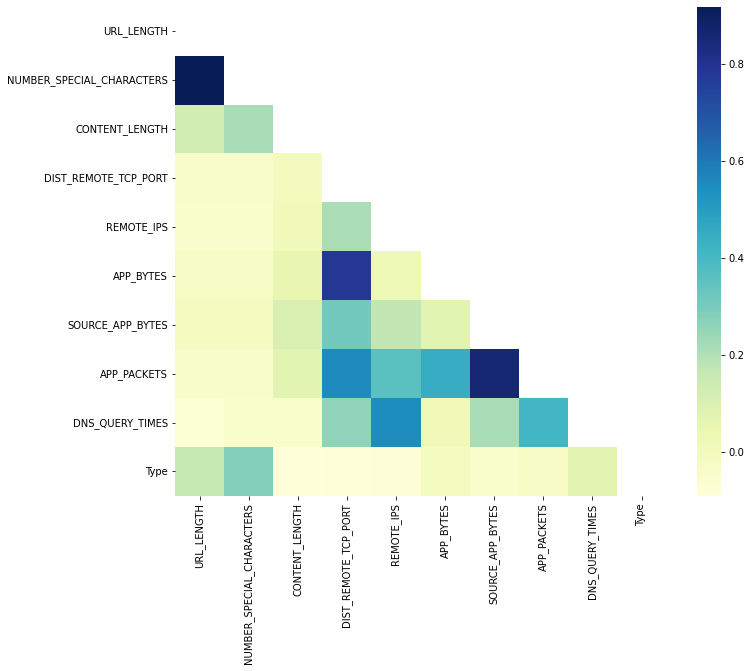

In [22]:
corr = websites.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu")

In [23]:
corr

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.039839,-0.046367,-0.026446,-0.014857,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.042619,-0.047103,-0.023914,-0.014376,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,-0.000381,0.004774,0.051202,0.100094,0.074142,-0.045644,-0.090852
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,1.000000,0.210188,0.780238,0.313359,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.210188,1.000000,0.023126,0.171651,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.780238,0.023126,1.000000,0.074464,0.445822,0.012221,-0.011262
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.313359,0.171651,0.074464,1.000000,0.857495,0.215285,-0.043852
APP_PACKETS,-0.042264,-0.040096,0.074142,0.558612,0.361104,0.445822,0.857495,1.000000,0.410843,-0.034414
DNS_QUERY_TIMES,-0.068582,-0.050048,-0.045644,0.259942,0.548189,0.012221,0.215285,0.410843,1.000000,0.068753
Type,0.162104,0.280897,-0.090852,-0.082925,-0.078783,-0.011262,-0.043852,-0.034414,0.068753,1.000000


<AxesSubplot:>

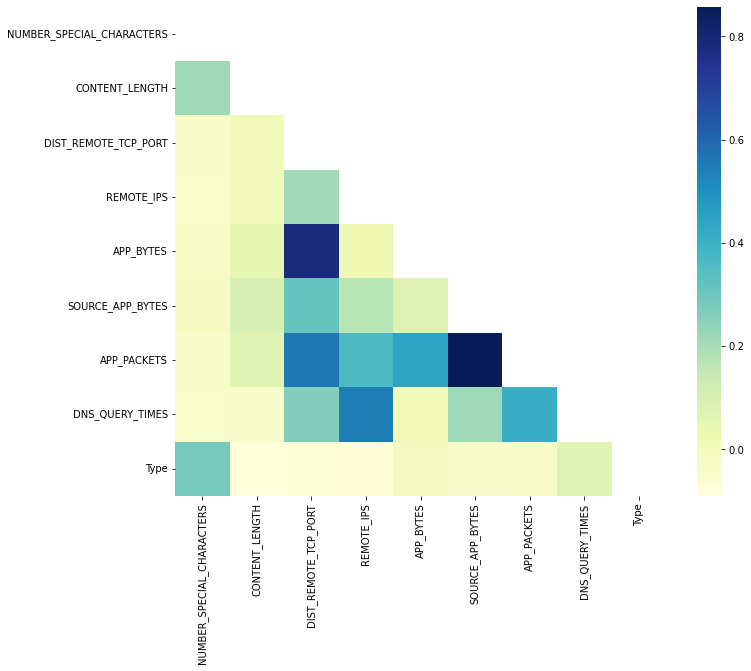

In [24]:
#There are still two columns that have correlation above 90% i.e. URL_Length and Number of special characters so I will drop one of them 
websites.drop(columns='URL_LENGTH', inplace=True)
corr = websites.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu")


In [25]:
corr

,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
NUMBER_SPECIAL_CHARACTERS,1.000000,0.214225,-0.042619,-0.047103,-0.023914,-0.014376,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.214225,1.000000,-0.000381,0.004774,0.051202,0.100094,0.074142,-0.045644,-0.090852
DIST_REMOTE_TCP_PORT,-0.042619,-0.000381,1.000000,0.210188,0.780238,0.313359,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.047103,0.004774,0.210188,1.000000,0.023126,0.171651,0.361104,0.548189,-0.078783
APP_BYTES,-0.023914,0.051202,0.780238,0.023126,1.000000,0.074464,0.445822,0.012221,-0.011262
SOURCE_APP_BYTES,-0.014376,0.100094,0.313359,0.171651,0.074464,1.000000,0.857495,0.215285,-0.043852
APP_PACKETS,-0.040096,0.074142,0.558612,0.361104,0.445822,0.857495,1.000000,0.410843,-0.034414
DNS_QUERY_TIMES,-0.050048,-0.045644,0.259942,0.548189,0.012221,0.215285,0.410843,1.000000,0.068753
Type,0.280897,-0.090852,-0.082925,-0.078783,-0.011262,-0.043852,-0.034414,0.068753,1.000000


In [26]:
#Now it looks ok, there are no columns that are correlated more than 90%

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [27]:
# Your code here
websites.isna().sum()

URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [28]:
# Your code here
#I can drop column CONTENT_LENGTH as it has a lot of missing values (almost 46%)
websites['CONTENT_LENGTH'].isna().sum()/websites.shape[0]


0.45592363840539024

In [29]:
websites.drop(columns='CONTENT_LENGTH', inplace=True)

In [30]:
websites.isna().sum()

URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

In [31]:
#There are only 2 rows with missing values 
websites[(websites['SERVER'].isna()) | (websites['DNS_QUERY_TIMES'].isna())]

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1306,B0_2134,11,UTF-8,NaN,US,District of Columbia,1/02/2003 16:44,2/02/2017 17:11,2,4,1026,246,15,0.0,0
1659,B0_772,15,UTF-8,Apache,CA,ON,14/12/2009 0:00,13/12/2016 0:00,2,2,276,416,4,NaN,0


In [32]:
#These 2 rows constitute only for 0.1% od data so I can drop them
(2/websites.shape[0])*100

0.11229646266142618

In [33]:
websites.dropna(inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [34]:
# Examine missing values in each column
websites.isna().sum()

URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [35]:
# Your code here
websites['WHOIS_COUNTRY'].unique()


array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [36]:
dic={"Cyprus":"CY", "us":"US","se":"SE","United Kingdom":"GB","[u'GB'; u'UK']":"GB","ru":"RU"}
for el in dic:
    websites.loc[websites['WHOIS_COUNTRY'] == el, 'WHOIS_COUNTRY'] = dic[el]

In [37]:
websites['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [38]:
websites['WHOIS_COUNTRY'].value_counts()[:10]

US      1105
None     306
CA        83
ES        63
AU        35
GB        25
PA        21
JP        11
UK        10
CN        10
Name: WHOIS_COUNTRY, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [39]:
# Your code here
to_rename = websites['WHOIS_COUNTRY'].value_counts()[10:].index.tolist()
for el in to_rename:
    websites.loc[websites['WHOIS_COUNTRY'] == el, 'WHOIS_COUNTRY'] = 'Other'

In [40]:
websites['WHOIS_COUNTRY'].value_counts()

US       1105
None      306
Other     110
CA         83
ES         63
AU         35
GB         25
PA         21
JP         11
UK         10
CN         10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.


In [41]:
# Your code here
websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

In [42]:
websites.head()

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,7,iso-8859-1,nginx,None,0,2,700,1153,9,2.0,1
1,B0_2314,6,UTF-8,Apache/2.4.10,None,7,4,1230,1265,17,0.0,0
2,B0_911,6,us-ascii,Microsoft-HTTPAPI/2.0,None,0,0,0,0,0,0.0,0
3,B0_113,6,ISO-8859-1,nginx,US,22,3,3812,18784,39,8.0,0
4,B0_403,6,UTF-8,None,US,2,5,4278,129889,61,4.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [43]:
# Your code here
websites.dtypes


URL                           object
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [44]:
# Your code here
websites.drop(columns='URL', inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [45]:
# Your code here
websites['CHARSET'].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

In [46]:
#At the same time there is a diffrence in case of characters, so I will unify that:
websites['CHARSET']=websites['CHARSET'].str.lower()

In [47]:
websites['CHARSET'].unique()

array(['iso-8859-1', 'utf-8', 'us-ascii', 'none', 'windows-1251',
       'iso-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [48]:
# Your code here
websites['SERVER'].unique()


array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

In [49]:
len(websites['SERVER'].unique())

239

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [50]:
# Your code here
#I will wirte a function using Regular expresions to reconvert 'SERVER' column
import re

def server_mapping(val):
	pattern1 = re.compile('Microsoft', re.IGNORECASE)
	pattern2 = re.compile('Apache', re.IGNORECASE)
	pattern3 = re.compile('nginx', re.IGNORECASE)


	if re.search(pattern1, val):
		val = 'Microsoft'
	elif re.search(pattern2, val):
		val = 'Apache'
	elif re.search(pattern3, val):
		val = 'nginx'	
	else:
		val = 'Other'
	return val


websites['SERVER']=websites['SERVER'].map(server_mapping)


In [51]:
# Count `SERVER` value counts here
websites['SERVER'].unique()

array(['nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

In [52]:
websites['SERVER'].value_counts()

Apache       642
Other        503
nginx        436
Microsoft    198
Name: SERVER, dtype: int64

In [53]:
websites.shape

(1779, 11)

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [54]:
# Your code here
website_dummy = pd.get_dummies(data=websites, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [55]:
# Your code here
website_dummy.head()

,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_iso-8859-1,CHARSET_none,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_None,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,7,0,2,700,1153,9,2.0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,6,7,4,1230,1265,17,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,6,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6,22,3,3812,18784,39,8.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,6,2,5,4278,129889,61,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
website_dummy.shape

(1779, 27)

In [57]:
website_dummy.dtypes

NUMBER_SPECIAL_CHARACTERS      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_iso-8859-1             uint8
CHARSET_none                   uint8
CHARSET_us-ascii               uint8
CHARSET_utf-8                  uint8
CHARSET_windows-1251           uint8
CHARSET_windows-1252           uint8
SERVER_Microsoft               uint8
SERVER_Other                   uint8
SERVER_nginx                   uint8
WHOIS_COUNTRY_CA               uint8
WHOIS_COUNTRY_CN               uint8
WHOIS_COUNTRY_ES               uint8
WHOIS_COUNTRY_GB               uint8
WHOIS_COUNTRY_JP               uint8
WHOIS_COUNTRY_None             uint8
WHOIS_COUNTRY_Other            uint8
WHOIS_COUNTRY_PA               uint8
WHOIS_COUNTRY_UK               uint8
WHOIS_COUNTRY_US               uint8
d

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [58]:
x = website_dummy.drop(['Type'], axis=1)
y = website_dummy['Type']
# print(X.head())
print(x.shape)
# print(y.head())
print(y.shape)

(1779, 26)
(1779,)


In [59]:
from sklearn.model_selection import train_test_split

# Your code here:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1423, 26)
(1423,)
(356, 26)
(356,)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [60]:
# Your code here:
from sklearn.linear_model import LogisticRegression



Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [61]:
# Your code here:
lr = LogisticRegression(random_state = 0, solver='sag', multi_class='auto', max_iter=10000)
lr.fit(x_train, y_train)


LogisticRegression(max_iter=10000, random_state=0, solver='sag')

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [62]:
# Your code here:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


What are your thoughts on the performance of the model? Write your conclusions below.

In [63]:
# Your conclusions here:

y_pred = lr.predict(x_test)
# Predict probabilities
probs_y=lr.predict_proba(x_test)
### Print results 
probs_y = np.round(probs_y, 2)

In [64]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report

The accuracy of the Logistic Regression is: 85.95505617977528 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       306
           1       0.00      0.00      0.00        50

    accuracy                           0.86       356
   macro avg       0.43      0.50      0.46       356
weighted avg       0.74      0.86      0.79       356



C:\Users\radek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


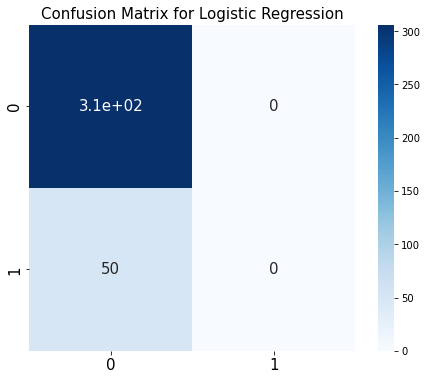

In [65]:
print('The accuracy of the Logistic Regression is:', lr.score(x_test, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [66]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


0.9185393258426966
[[299   7]
 [ 22  28]]


To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [67]:
# Your code here:



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [68]:
# Your code here:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

0.9213483146067416
[[301   5]
 [ 23  27]]


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [69]:
# Your conclusions here:

'''
The accuracy score improved as well as the confusion matrix. More values were clasified correctly (328 vs. 327)
'''

'\nThe accuracy score improved as well as the confusion matrix. More values were clasified correctly (328 vs. 327)\n'

#### Please implement decision tree, random forest, SVM and extra tree. Which model is better? 

The accuracy of the Decision Tree is 0.913
[[301   5]
 [ 23  27]]


[Text(188.32500000000002, 199.32, 'X[18] <= 0.5\ngini = 0.206\nsamples = 1423\nvalue = [1257, 166]'),
 Text(167.4, 163.07999999999998, 'X[1] <= 1.5\ngini = 0.159\nsamples = 1377\nvalue = [1257, 120]'),
 Text(62.775000000000006, 126.83999999999999, 'X[4] <= 31.0\ngini = 0.25\nsamples = 770\nvalue = [657, 113]'),
 Text(41.85, 90.6, 'gini = 0.0\nsamples = 472\nvalue = [472, 0]'),
 Text(83.7, 90.6, 'X[4] <= 13338.0\ngini = 0.471\nsamples = 298\nvalue = [185, 113]'),
 Text(41.85, 54.359999999999985, 'X[3] <= 2140.0\ngini = 0.499\nsamples = 203\nvalue = [107, 96]'),
 Text(20.925, 18.119999999999976, 'gini = 0.481\nsamples = 169\nvalue = [101, 68]'),
 Text(62.775000000000006, 18.119999999999976, 'gini = 0.291\nsamples = 34\nvalue = [6, 28]'),
 Text(125.55000000000001, 54.359999999999985, 'X[22] <= 0.5\ngini = 0.294\nsamples = 95\nvalue = [78, 17]'),
 Text(104.625, 18.119999999999976, 'gini = 0.176\nsamples = 82\nvalue = [74, 8]'),
 Text(146.475, 18.119999999999976, 'gini = 0.426\nsamples = 13

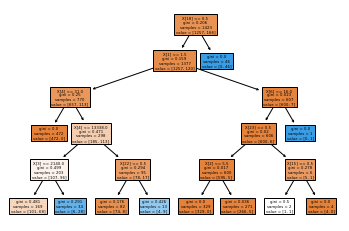

In [70]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth = 5, random_state = 1)
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(accuracy_score(prediction,y_test)))
print(confusion_matrix(y_test, y_pred))
plot_tree(tree, filled = True)

The accuracy of the Random Forest Classifier is: 94.9438202247191 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       306
           1       0.97      0.66      0.79        50

    accuracy                           0.95       356
   macro avg       0.96      0.83      0.88       356
weighted avg       0.95      0.95      0.95       356



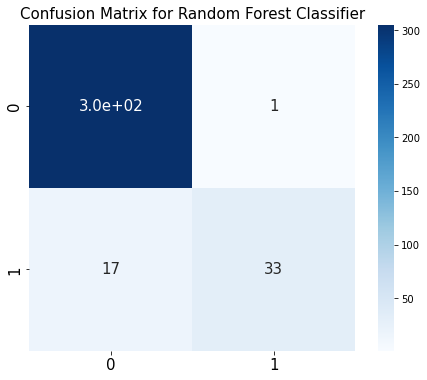

In [71]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

The accuracy of the SVM is: 90.73033707865169 %

The classification report for SVM is:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       306
           1       0.95      0.36      0.52        50

    accuracy                           0.91       356
   macro avg       0.93      0.68      0.74       356
weighted avg       0.91      0.91      0.89       356



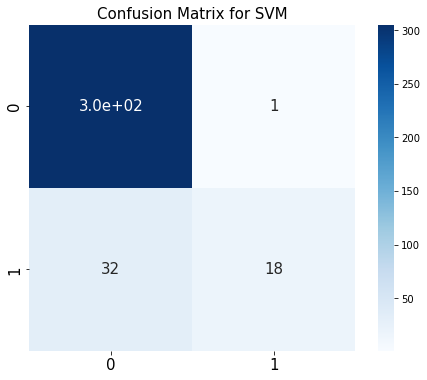

In [72]:
#SVM
from sklearn import svm
clf = svm.SVC(gamma='auto').fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc_clf = clf.score(x_test, y_test)
print('The accuracy of the SVM is:', acc_clf * 100, '%')
generate_results(clf, y_pred, 'SVM')

The accuracy of the Extra Tree Classifier is: 95.2247191011236 %

The classification report for Extra Tree Classifier is:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       306
           1       0.95      0.70      0.80        50

    accuracy                           0.95       356
   macro avg       0.95      0.85      0.89       356
weighted avg       0.95      0.95      0.95       356



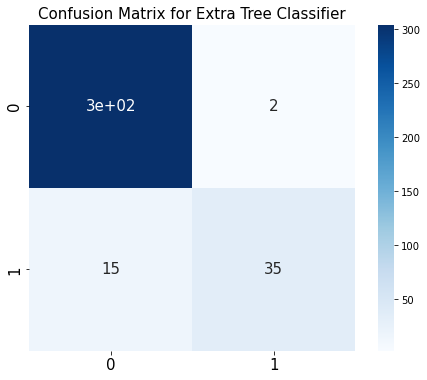

In [73]:
#EXTRA TREE
from sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier()
etc.fit(x_train, y_train)
y_pred = etc.predict(x_test)
acc_etc = etc.score(x_test, y_test)
print('The accuracy of the Extra Tree Classifier is:', acc_etc * 100, '%')
generate_results(etc, y_pred, 'Extra Tree Classifier')

For the four tested models the best accuracy was observed for Extra Tree Classifier. Thus I would assume that this is the best model

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [77]:
# Your code here
from sklearn.preprocessing import RobustScaler

trans_x_test = RobustScaler().fit(x_test).transform(x_test)
trans_x_train = RobustScaler().fit(x_train).transform(x_train)


In [78]:
lr = LogisticRegression(random_state = 0, solver='sag', multi_class='auto', max_iter=10000)
lr.fit(trans_x_train, y_train)

LogisticRegression(max_iter=10000, random_state=0, solver='sag')

The accuracy of the Logistic Regression is: 86.79775280898876 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       306
           1       0.80      0.08      0.15        50

    accuracy                           0.87       356
   macro avg       0.83      0.54      0.54       356
weighted avg       0.86      0.87      0.82       356



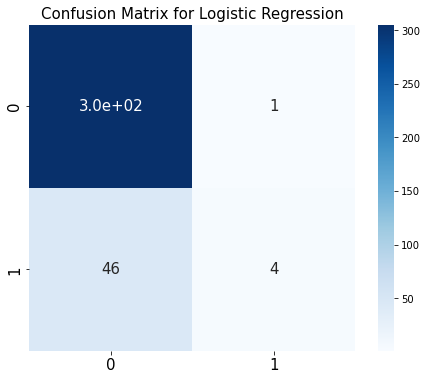

In [79]:
y_pred = lr.predict(trans_x_test)

print('The accuracy of the Logistic Regression is:', lr.score(trans_x_test, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

The accuracy of logistic regression increased from 85.95505617977528 % to 86.79775280898876 %. It can be also observed from the comparison of confusion matrixs that after standarization of the data the model predicts correctly type 1 websites. Before it didn't find any.  